In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns


In [28]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    r"E:\3rdyear\2nd_sem\3200\datafiles\mnist_png\train",
    image_size=(28,28),
    batch_size=32,
    color_mode="grayscale",
    label_mode="int",
    shuffle =True,
)


Found 60000 files belonging to 10 classes.


In [29]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    r"E:\3rdyear\2nd_sem\3200\datafiles\mnist_png\test",
    image_size=(28,28),
    batch_size=32,
    color_mode="grayscale",
    label_mode="int",
    shuffle=False,
)

Found 10000 files belonging to 10 classes.


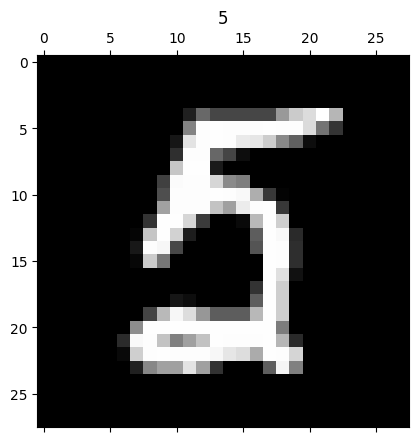

In [30]:
for images, labels in train_dataset.take(1):
    plt.matshow(images[0].numpy().squeeze(),cmap="gray")
    plt.title(labels[2].numpy())
    plt.show()


In [31]:
normalization_layer = layers.Rescaling(1./255)

In [32]:
train_dataset =train_dataset.map(lambda x, y: (normalization_layer(x),y))
test_dataset = test_dataset.map(lambda x,y: (normalization_layer(x),y))

In [33]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 126s 66ms/step - accuracy: 0.9618 - loss: 0.1253 - val_accuracy: 0.9848 - val_loss: 0.0462
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9876 - loss: 0.0427 - val_accuracy: 0.9885 - val_loss: 0.0329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9894 - val_loss: 0.0346
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9903 - val_loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9897 - val_loss: 0.0325


In [38]:
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
x_test_images = np.concatenate([x for x, y in test_dataset], axis=0)
y_pred_probs = model.predict(x_test_images)
y_pred = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [42]:
cm=confusion_matrix(y_true,y_pred)

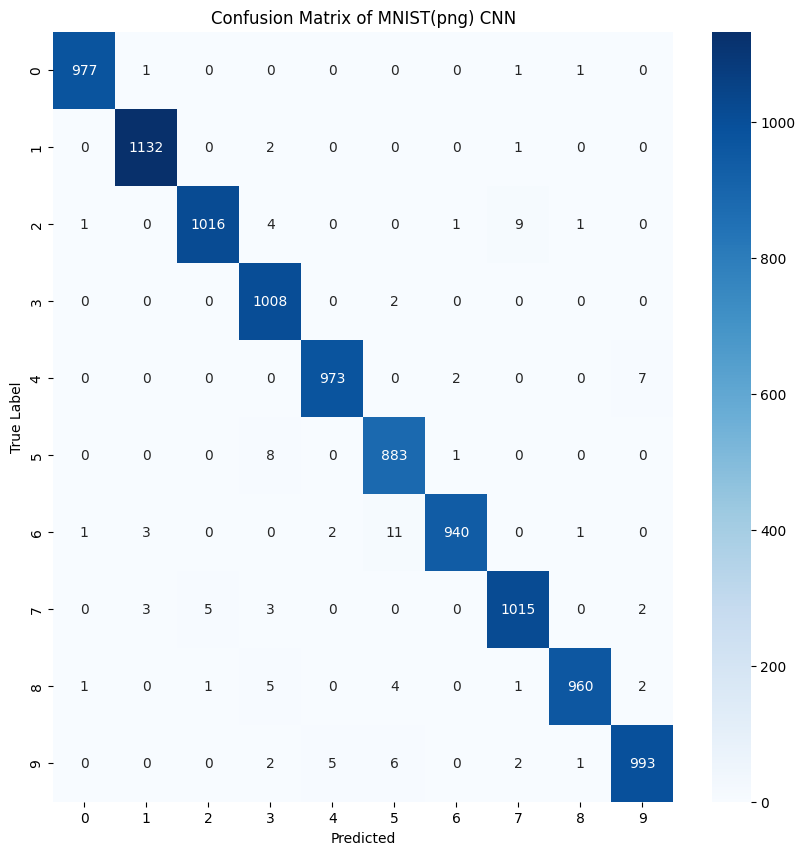

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.title("Confusion Matrix of MNIST(png) CNN")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


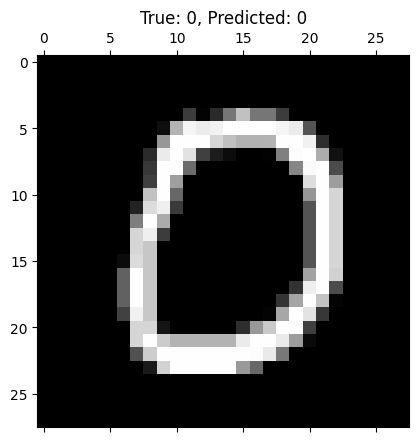

In [47]:
for images, labels in test_dataset.take(1):
    plt.matshow(images[0].numpy().squeeze(), cmap="gray")
    pred_label = np.argmax(model.predict(images[0:1]), axis=1)[0]
    plt.title(f"True: {labels[0].numpy()}, Predicted: {pred_label}")
    plt.show()


In [50]:
model.save(r"E:\3rdyear\2nd_sem\3200\OCR_GUI\mnist_cnn_model.keras")
